In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('DataSet.csv')

data_tr = data.sample(frac=0.8, random_state=500)
data_te = data.drop(data_tr.index)

In [3]:
data_tr

,State,Population(In millions),Income,Size(sq. miles),Temperature,TotalCapitalOutlays,PopualtionDensity,Politicalscore,Precipitation
25,Nevada,2.998333,49185.66667,110572,51.966667,1193.666667,27.110982,0.555556,10.433333
22,Missouri,6.113333,46860.83333,69707,55.950000,806.166667,87.747168,0.280034,46.595000
37,South Carolina,5.045000,43988.33333,32020,64.583333,1056.333333,157.474329,0.369608,52.780000
42,Vermont,0.625000,52735.83333,9217,43.483333,958.666667,68.121099,0.605556,44.340000
41,Utah,3.126667,45320.00000,84897,50.100000,1468.000000,36.832002,0.182692,13.006667
16,Maine,1.338333,48095.16667,35380,42.083333,721.500000,37.900137,0.528674,44.485000
24,Nebraska,1.923333,52263.16667,77348,49.816667,1786.666667,24.855474,0.302721,26.260000
4,Colorado,5.638333,57652.50000,104094,47.033333,1448.166667,54.189720,0.546667,17.303333
20,Minnesota,5.588333,56028.16667,86936,42.083333,1458.000000,64.288584,0.493367,30.240000
12,Iowa,3.148333,48747.16667,56273,48.816667,1540.666667,55.975186,0.432222,38.163333


In [4]:
data_te

,State,Population(In millions),Income,Size(sq. miles),Temperature,TotalCapitalOutlays,PopualtionDensity,Politicalscore,Precipitation
1,Arizona,7.071667,45203.50000,113990,62.000000,897.333333,62.042340,0.429630,11.510000
7,Florida,21.023333,50756.66667,65758,72.733333,995.833333,319.628045,0.357292,55.916667
8,Georgia,10.465000,46315.33333,59425,65.550000,924.333333,176.043032,0.359463,52.598333
13,Kansas,2.915000,50470.33333,82278,55.616667,1253.833333,35.444568,0.274747,31.036667
14,Kentucky,4.458333,42184.50000,40408,57.200000,1044.333333,110.405019,0.385266,56.821667
17,Maryland,6.045000,60197.83333,12406,56.283333,1053.833333,487.641182,0.667553,48.315000
26,New Hampshire,1.353333,60581.16667,9349,44.616667,659.333333,144.845171,0.474057,46.100000
31,North Dakota,0.763333,55314.50000,70698,41.500000,2866.833333,10.776557,0.202128,17.940000
39,Tennessee,6.745000,46579.50000,42144,59.466667,864.000000,160.088917,0.232323,60.366667
45,West Virginia,1.815000,40576.33333,24038,53.683333,870.666667,75.501165,0.385572,51.350000


In [5]:
cap_tr=data_tr["TotalCapitalOutlays"]

In [6]:
inc_tr=data_tr["Income"]

In [7]:
tem_tr=data_tr["Temperature"]

In [8]:
Pd_tr=data_tr["PopualtionDensity"]

In [9]:
Ps_tr=data_tr["Politicalscore"]

In [10]:
Pr_tr=data_tr["Precipitation"]

In [11]:
cap_te=data_te["TotalCapitalOutlays"]

In [12]:
inc_te=data_te["Income"]

In [13]:
Pd_te=data_te["PopualtionDensity"]

In [14]:
tem_te=data_te["Temperature"]

In [15]:
Ps_te=data_te["Politicalscore"]

In [16]:
Pr_te=data_te["Precipitation"]

### Train

In [17]:
def simp_fun(X,A,B):
    return A*X+B
    

In [18]:
ppop_inc,pcov_inc=curve_fit(simp_fun,inc_tr,cap_tr)
A=ppop_inc[0]
B=ppop_inc[1]
sim_pre_inc=A*inc_tr+B
rsquared_inc=r2_score(cap_tr,sim_pre_inc)
re1=cap_tr-sim_pre_inc
print(rsquared_inc)
A

0.16667385145402647


0.025699523093474005

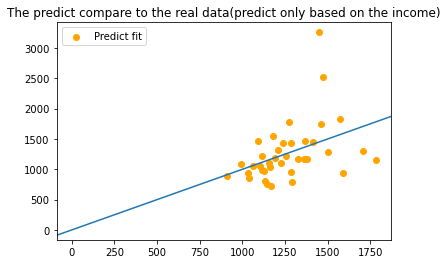

In [19]:
plt.scatter(sim_pre_inc, cap_tr, color = "orange", label = "Predict fit")
plt.legend()
plt.title("The predict compare to the real data(predict only based on the income)")
plt.axline((0, 0), slope=1)

In [20]:
ppop_pd,pcov_pd=curve_fit(simp_fun,Pd_tr,cap_tr)
A=ppop_pd[0]
B=ppop_pd[1]
sim_pre_pd=A*Pd_tr+B
rsquared_pd=r2_score(cap_tr, sim_pre_pd)
re2=cap_tr-sim_pre_pd
print(rsquared_pd)
A


0.04658621879020297


-0.45669257630204996

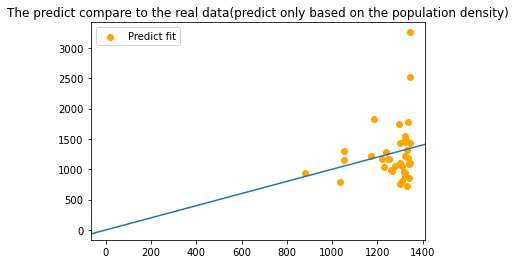

In [21]:
plt.scatter(sim_pre_pd, cap_tr, color = "orange", label = "Predict fit")
plt.legend()
plt.title("The predict compare to the real data(predict only based on the population density)")
plt.axline((0, 0), slope=1)

In [22]:
ppop_tem,pcov_tem=curve_fit(simp_fun,tem_tr,cap_tr)
A=ppop_tem[0]
B=ppop_tem[1]
sim_pre_tem=A*tem_tr+B
rsquared_tem=r2_score(cap_tr, sim_pre_tem)
re3=cap_tr-sim_pre_tem
print(rsquared_tem)
rsquared_tem

2.4522081430999876e-06


2.4522081430999876e-06

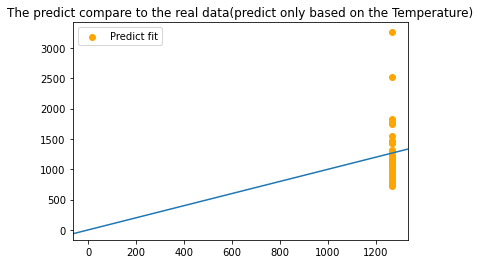

In [23]:
plt.scatter(sim_pre_tem, cap_tr, color = "orange", label = "Predict fit")
plt.legend()
plt.title("The predict compare to the real data(predict only based on the Temperature)")
plt.axline((0, 0), slope=1)

In [24]:
ppop_pr,pcov_pr=curve_fit(simp_fun,Pr_tr,cap_tr)
A=ppop_pr[0]
B=ppop_pr[1]
sim_pre_pr=A*Pr_tr+B
rsquared_pr=r2_score(cap_tr, sim_pre_pr)
re_com=cap_tr-sim_pre_pr
print(rsquared_pr)
print(A)

0.02220514609609181
-4.805239484820298


Text(0.5, 1.0, 'The predict compare to the real data(predict only based on the Precipitation)')

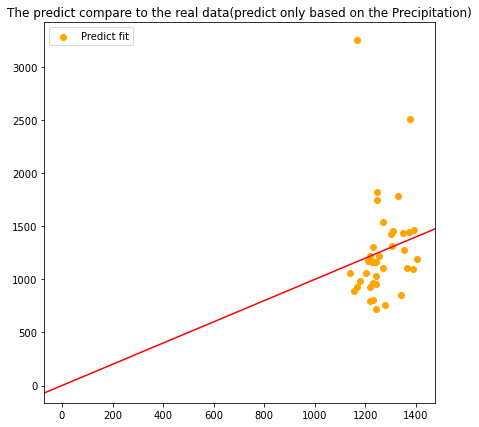

In [25]:
plt.figure(figsize=[7,7])
plt.axline((0, 0), slope=1,color="Red")
plt.scatter(sim_pre_pr, cap_tr, color = "orange", label = "Predict fit")
plt.legend()

plt.title("The predict compare to the real data(predict only based on the Precipitation)")

Conclunsion: the Size of each state don't have significant influence on the Expenidture of Infrastructure

In [26]:
def simp2_fun(X,A,B,C):
    x,y=X
    return A*x+B*y+C

In [27]:
x=inc_tr
y=tem_tr

ppop2,pcov2=curve_fit(simp2_fun,(inc_tr,tem_tr),cap_tr)
A2=ppop2[0]
B2=ppop2[1]
C2=ppop2[2]
sim_pre2=A2*inc_tr+B2*tem_tr+C2
rsquared2=r2_score(cap_tr, sim_pre2)
re4=cap_tr-sim_pre2
MSE4=mean_squared_error(cap_tr, sim_pre2)
RMSE4 = math.sqrt(MSE4)
print(rsquared2)
print(A2,B2)

0.1787683627998019
0.027536907040020483 7.273437537730094


Text(0.5, 1.0, 'The predict compare to the real data(predict  based on the Precipitation and the average income)')

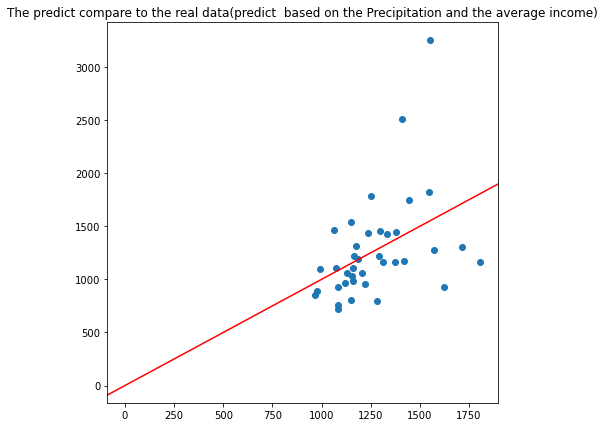

In [28]:
plt.figure(figsize=[7,7])
plt.axline((0, 0), slope=1,color="Red")
plt.scatter(sim_pre2,cap_tr, label = "Exact Data")

plt.title("The predict compare to the real data(predict  based on the Precipitation and the average income)")

In [29]:
def simp3_fun(X,A,B,C,D):
    x,y,z=X
    return A*x+B*y+C*z+D

In [30]:
x=inc_tr
y=tem_tr
z=Pd_tr
ppop6,pcov6=curve_fit(simp3_fun,(inc_tr,tem_tr,Pd_tr),cap_tr)
A6=ppop6[0]
B6=ppop6[1]
C6=ppop6[2]
D6=ppop6[3]
sim_pre6=A6*inc_tr+B6*tem_tr+C6*Pd_tr+D6
rsquared6=r2_score(cap_tr, sim_pre6)
re5=cap_tr-sim_pre6
MSE5=mean_squared_error(cap_tr, sim_pre6)
RMSE5 = math.sqrt(MSE5)
print(rsquared6)
print(A6,B6,C6)

0.5635816910768189
0.06023165610677886 18.563865717385173 -1.691002274829267


Text(0.5, 1.0, 'The predict compare to the real data(predict  based on the Popualtion Denisty , the average income,and the average Precipitation)')

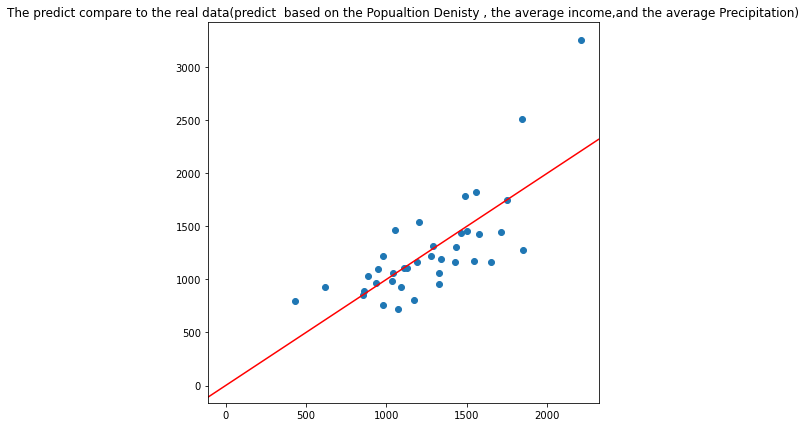

In [31]:
plt.figure(figsize=[7,7])
plt.axline((0, 0), slope=1,color="Red")
plt.scatter(sim_pre6,cap_tr, label = "Exact Data")
plt.title("The predict compare to the real data(predict  based on the Popualtion Denisty , the average income,and the average Precipitation)")

In [32]:
def simp8_fun(X,A,B,C,D,E):
    x,y,z,v=X
    return A*x+B*y+C*z+D*v+E

In [33]:
x=inc_tr
y=Pr_tr
z=Pd_tr
v=Ps_tr
ppop8,pcov8=curve_fit(simp8_fun,(inc_tr,Pr_tr,Pd_tr,Ps_tr),cap_tr)
A8=ppop8[0]
B8=ppop8[1]
C8=ppop8[2]
D8=ppop8[3]
E8=ppop8[4]
sim_pre8=A8*inc_tr+B8*Pr_tr+C8*Pd_tr+D8*Ps_tr+E8
rsquared8=r2_score(cap_tr, sim_pre8)
re6=cap_tr-sim_pre8
MSE6=mean_squared_error(cap_tr, sim_pre8)
RMSE6 = math.sqrt(MSE6)
print(rsquared8)
print(A8,B8,C8,D8)

0.5519590704744184
0.05712278664365739 3.008483217492758 -1.3000886295586145 -790.633843299452


Text(0.5, 1.0, 'Final model')

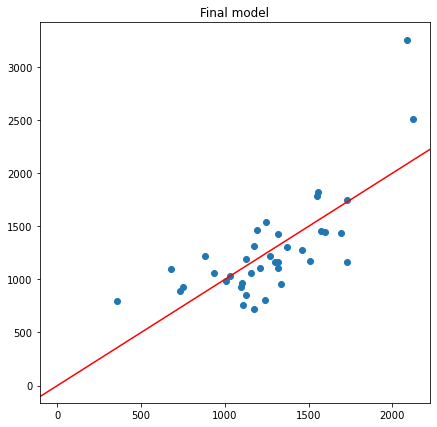

In [34]:
plt.figure(figsize=[7,7])
plt.scatter(sim_pre8,cap_tr, label = "Exact Data")
plt.axline((0, 0), slope=1,color="Red")
plt.title("Final model")

### Test

In [35]:

A2=ppop2[0]
B2=ppop2[1]
C2=ppop2[2]
sim_pre_te2=A2*inc_te+B2*tem_te+C2
rsquared_te2=r2_score(cap_te, sim_pre_te2)
re_te2=cap_te-sim_pre_te2
MSE_te2=mean_squared_error(cap_te, sim_pre_te2)
RMSE_te2 = math.sqrt(MSE_te2)
print(rsquared_te2)


-0.06521943906510286


Text(0.5, 1.0, 'The predict compare to the real data(predict  based on the Precipitation and the average income-test)')

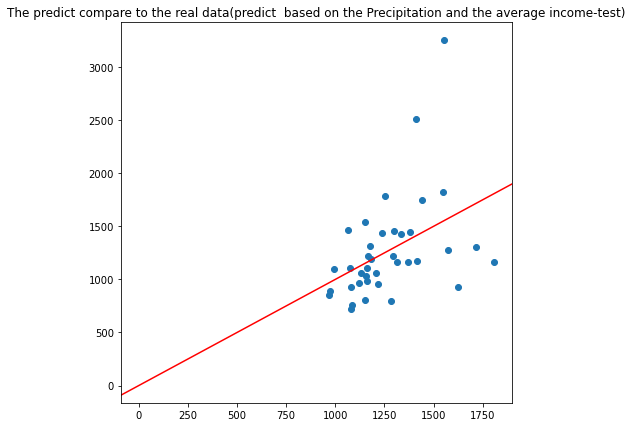

In [36]:
plt.figure(figsize=[7,7])
plt.axline((0, 0), slope=1,color="Red")
plt.scatter(sim_pre2,cap_tr, label = "Test Data")

plt.title("The predict compare to the real data(predict  based on the Precipitation and the average income-test)")

In [37]:

A6=ppop6[0]
B6=ppop6[1]
C6=ppop6[2]
D6=ppop6[3]
sim_pre_te3=A6*inc_te+B6*tem_te+C6*Pd_te+D6
re_te3=cap_te-sim_pre_te3
rsquared_te3=r2_score(cap_te, sim_pre_te3)
MSE_te3=mean_squared_error(cap_te, sim_pre_te3)
RMSE_te3 = math.sqrt(MSE_te3)
print(rsquared_te3)


0.06356640654083567


Text(0.5, 1.0, 'The predict compare to the real data(predict  based on the Popualtion Denisty , the average income,and the average Precipitation-test)')

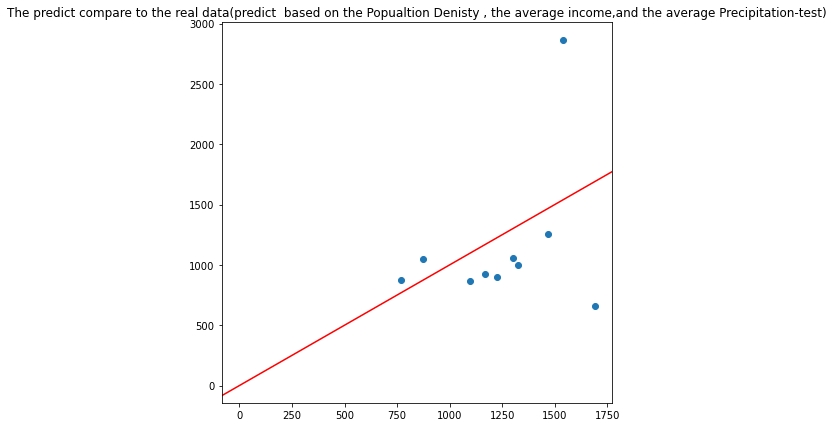

In [38]:
plt.figure(figsize=[7,7])
plt.axline((0, 0), slope=1,color="Red")
plt.scatter(sim_pre_te3,cap_te, label = "Test Data")
plt.title("The predict compare to the real data(predict  based on the Popualtion Denisty , the average income,and the average Precipitation-test)")

In [39]:

A8=ppop8[0]
B8=ppop8[1]
C8=ppop8[2]
D8=ppop8[3]
E8=ppop8[4]
sim_pre_te4=A8*inc_te+B8*Pr_te+C8*Pd_te+D8*Ps_te+E8
rsquared_te4=r2_score(cap_te, sim_pre_te4)
re_te4=cap_te-sim_pre_te4
MSE_te4=mean_squared_error(cap_te, sim_pre_te4)
RMSE_te4 = math.sqrt(MSE_te4)
print(rsquared_te4)


0.23970698294275372


Text(0.5, 1.0, 'final mode-Test ')

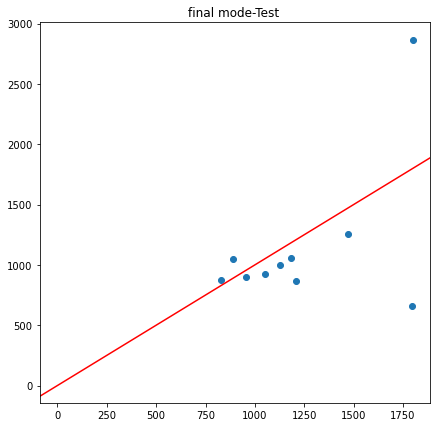

In [40]:
plt.figure(figsize=[7,7])
plt.scatter(sim_pre_te4,cap_te, label = "test Data")
plt.axline((0, 0), slope=1,color="Red")
plt.title("final mode-Test ")

In [41]:
print(RMSE4,RMSE5,RMSE6)

432.2556625941605 315.1079326693139 319.27631342927765


In [42]:
print(RMSE_te2,RMSE_te3,RMSE_te4)

612.1057933927689 573.9121788781238 517.1272806219407


### Residual

In [43]:
residual=pd.concat([re1,re2,re3,re4,re5,re6],axis=1)

In [44]:
residual

,0,1,2,3,4,5
25,0.571366,-142.452470,-73.409978,10.174725,-144.366194,69.030482
22,-327.181526,-502.260375,-461.308748,-342.279082,-363.247769,-433.464703
37,-3.192979,-220.249832,-212.006361,-75.806661,17.575076,123.651425
42,-325.666224,-358.723455,-307.560715,-260.882890,-366.366950,-377.924090
41,374.250489,136.320381,201.110226,404.533645,413.893462,274.279523
16,-443.569971,-609.691810,-544.587229,-360.077137,-349.132882,-450.514395
24,514.481084,449.517456,519.805258,534.067784,299.369126,235.788862
4,37.477788,124.414188,181.583896,67.406614,-262.465643,-152.610009
20,89.055713,138.859598,191.912771,157.972579,-45.827685,-117.921471
12,358.840607,217.729598,273.905367,392.160987,336.331000,297.668101


{'whiskers': [<matplotlib.lines.Line2D at 0x17a94dbea00>,
 'caps': [<matplotlib.lines.Line2D at 0x17a94dbefa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a94dbe730>,
 'medians': [<matplotlib.lines.Line2D at 0x17a94dd0580>,
 'fliers': [<matplotlib.lines.Line2D at 0x17a94dd0850>,
 'means': []}

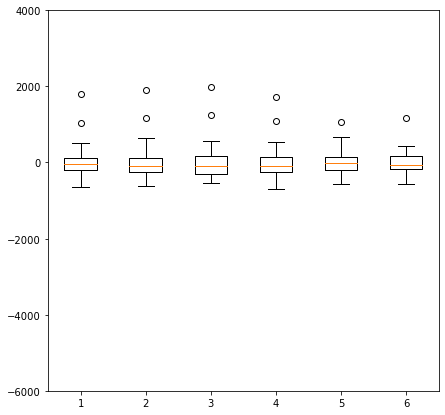

In [45]:
plt.figure(figsize=[7,7])
plt.ylim(-6000,4000)
plt.boxplot(residual)